In [47]:
# importo la funzione start_kaggle che ho definito nel file autenticazione.py
from autenticazione.autenticazione import start_kaggle

# chiamo la funzione start_kaggle
start_kaggle()

# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# importo le librerie necessarie di default
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Visualizzare la lista dei dataset
key_search = str(input("Inserisci la chiave di ricerca: "))
datasets = kaggle.api.datasets_list(search=key_search)

# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'

print("Lista dei dataset trovati: ")
for i in range(len(datasets)):
    print(f"{i}: {datasets[i]['ref']}")


Lista dei dataset trovati: 
0: fedesoriano/stroke-prediction-dataset
1: andrewmvd/heart-failure-clinical-data
2: thedevastator/jobs-dataset-from-glassdoor
3: fedesoriano/heart-failure-prediction
4: fedesoriano/company-bankruptcy-prediction
5: ananthr1/weather-prediction
6: rashikrahmanpritom/heart-attack-analysis-prediction-dataset
7: andrewmvd/divorce-prediction
8: itachi9604/disease-symptom-description-dataset
9: rkiattisak/student-performance-in-mathematics
10: rikdifos/credit-card-approval-prediction
11: iammustafatz/diabetes-prediction-dataset
12: shubhambathwal/flight-price-prediction
13: thedevastator/cancer-patients-and-air-pollution-a-new-link
14: iamsouravbanerjee/house-rent-prediction-dataset
15: dronio/SolarEnergy
16: shebrahimi/financial-distress
17: divyansh22/flight-delay-prediction
18: fedesoriano/cirrhosis-prediction-dataset
19: rishidamarla/heart-disease-prediction


In [49]:
# scelgo il dataset che mi interessa e lo scarico
dt_scelto = int(input("Inserisci il numero del dataset che ti interessa: "))

# salvo in una variabile i nomi di tutti i file del dataset
file_name = kaggle.api.dataset_list_files(datasets[dt_scelto]['ref']).files

# scarico il dataset
kaggle.api.dataset_download_files(datasets[dt_scelto]['ref'], path=path, unzip=True)

In [50]:
for i in range(len(file_name)):
    print(f"File n {i}: {file_name[i]}")


File n 0: seattle-weather.csv


In [51]:
choise = int(input('Scegli il file da aprire: '))
if '.csv' in str(file_name[choise]):
    df = pd.read_csv(path + '/' + str(file_name[choise]))
elif '.json' in str(file_name[choise]):
    df = pd.read_json(path + '/' + str(file_name[choise]))
else:
    print('Formato non riconosciuto')

In [52]:
# visualizziamo alcune informazioni utili sul dataset
# valori nulli
print(f"Numero di valori nulli per colonna: \n{df.isnull().sum()}")
# tipo di dato per colonna
print(f"Tipo di dato per colonna: \n{df.dtypes}")
# dimensione del dataset
print(f"Dimensione del dataset: \n{df.shape}")

# visualizziamo le prime 5 righe del dataset
print(f"Prime 5 righe del dataset: \n{df.head()}")

Numero di valori nulli per colonna: 
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Tipo di dato per colonna: 
date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object
Dimensione del dataset: 
(1461, 6)
Prime 5 righe del dataset: 
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [53]:
# trasformo la colonna 'Date' in formato datetime e la imposto come indice
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True)


In [54]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [55]:
# analizio la colonna 'weather' e vediamo quanti valori unici ci sono
print(f"Valori unici della colonna 'weather': \n{df['weather'].unique()}")

Valori unici della colonna 'weather': 
['drizzle' 'rain' 'sun' 'snow' 'fog']


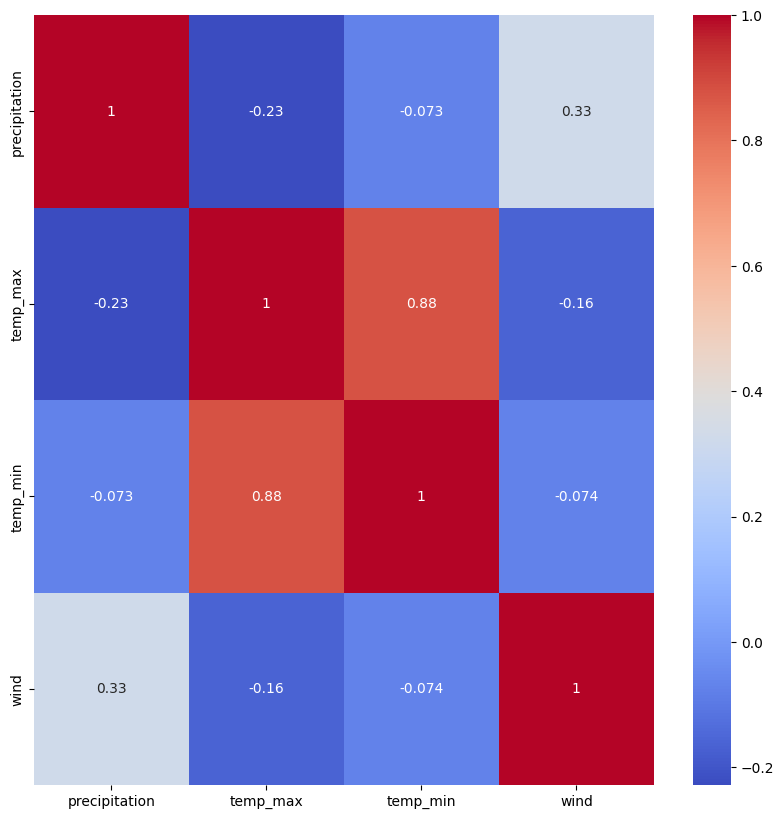

In [56]:
# vediamo le possibili correlazioni tra le colonne
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


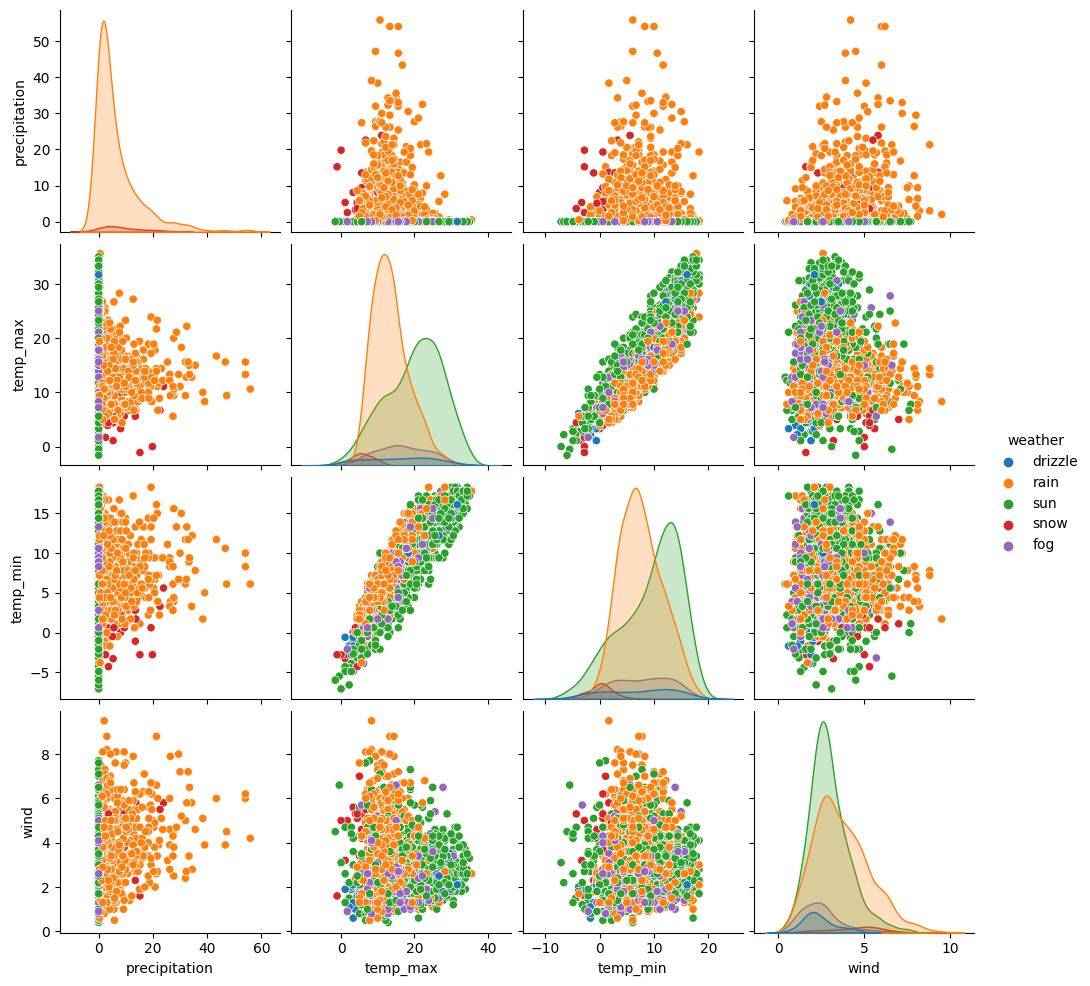

In [57]:
# eseguiamo una clusterizzazione per vedere se ci sono dei gruppi di dati simili usando come feature 'weather'
# prima pero' vediamo se con un grafico a dispersione riusciamo a capire se ci sono dei gruppi
# analizziamo alcuni rapporti tra le colonne
sns.pairplot(df, hue='weather')
plt.show()

PROVIAMO A VEDERE SE UNA CLUSTERIZZAZIONE CON KMEANS RIESCE A PREVEDERE IL VALORE DELLA VARIABILE TARGET

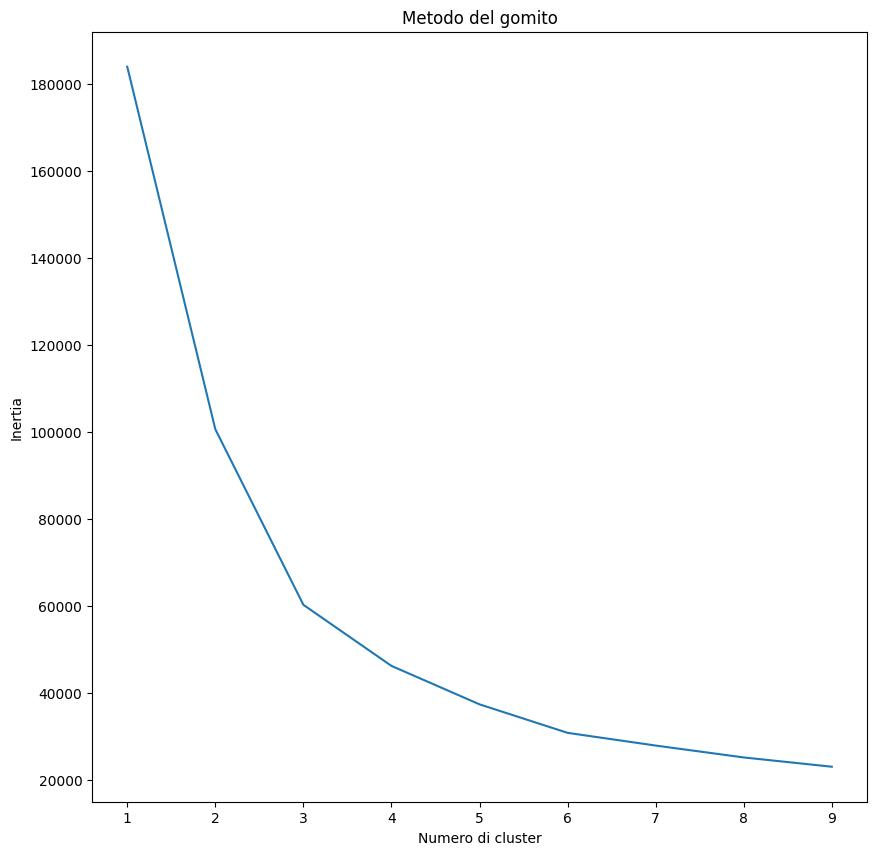

Numero di cluster ottimale: 3


In [58]:
# effettuiamo un clustering con KMeans
from sklearn.cluster import KMeans

df_copy = df.drop(['weather'], axis=1)
# verifichiamo il numero di cluster ottimale
# per farlo usiamo il metodo del gomito
n_cluster_max = 10
inertia = []
for i in range(1, n_cluster_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_copy)
    inertia.append(kmeans.inertia_)

# visualizziamo il grafico del gomito
plt.figure(figsize=(10, 10))
plt.plot(range(1, n_cluster_max), inertia)
plt.title('Metodo del gomito')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.show()

# ricaviamo il numero di cluster ottimale
from kneed import KneeLocator

kl = KneeLocator(range(1, n_cluster_max), inertia, curve='convex', direction='decreasing')
n_cluster = kl.elbow
print(f"Numero di cluster ottimale: {n_cluster}")


<Figure size 1000x1000 with 0 Axes>

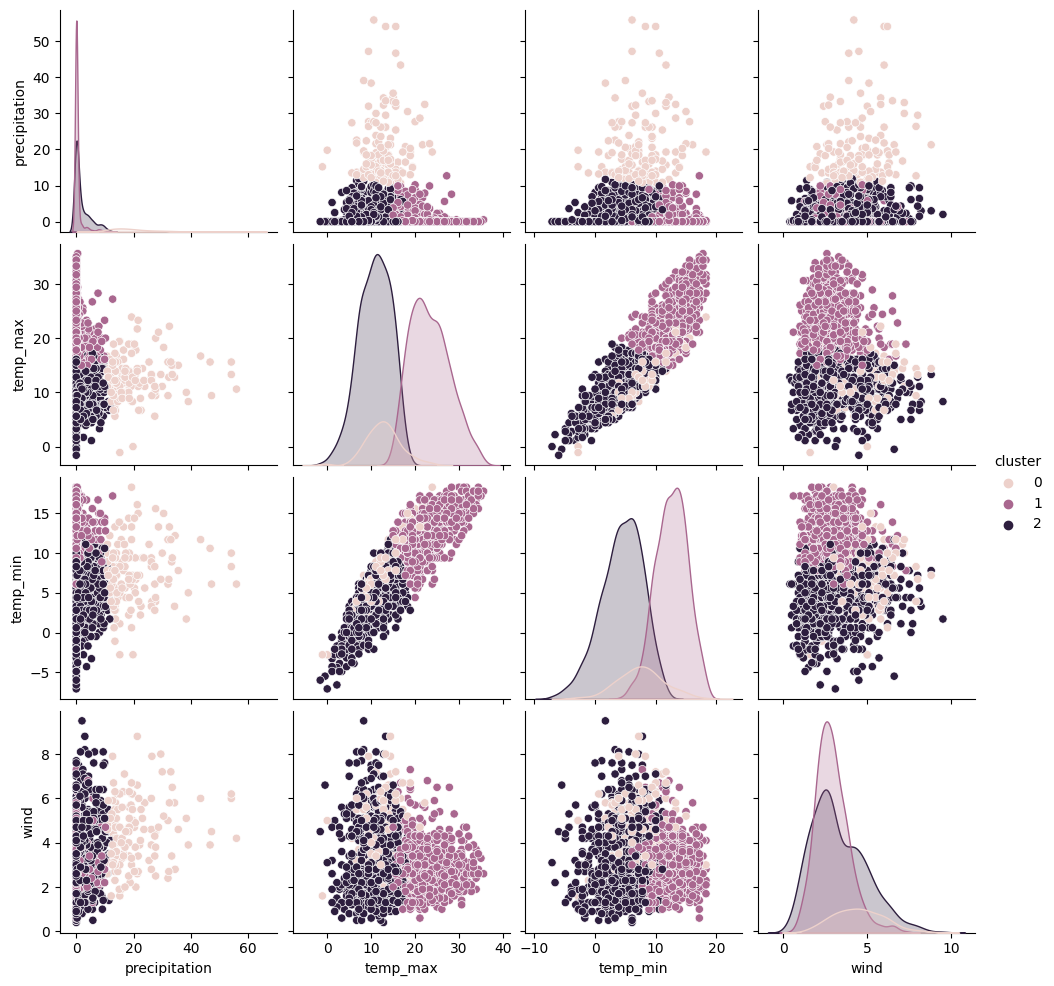

Silhouette: 0.49235067322046644
Calinski-Harabasz: 1505.6982002709608
Davies-Bouldin: 0.7412378456390307
Il clustering non ha avuto un buon risultato


In [59]:
# eseguiamo il clustering con il numero di cluster ottimale
kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0)
kmeans.fit(df_copy)
labels = kmeans.labels_
df_copy['cluster'] = labels

# visualizziamo i cluster
plt.figure(figsize=(10, 10))
sns.pairplot(df_copy, hue='cluster')
plt.show()

# calcoliamo le metriche di valutazione del clustering: Silhouette e Calinski-Harabasz e Davies-Bouldin
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# valutiamo anche il risultato
siluette = silhouette_score(df_copy, labels)
calinski = calinski_harabasz_score(df_copy, labels)
davies = davies_bouldin_score(df_copy, labels)

print(f"Silhouette: {siluette}")
print(f"Calinski-Harabasz: {calinski}")
print(f"Davies-Bouldin: {davies}")

if siluette > 0.5 and calinski > 100 and davies < 1:
    print("Il clustering ha avuto un buon risultato")
else:
    print("Il clustering non ha avuto un buon risultato")



INIZIALIZIAMO UNA REGRESSIONE LOGISTICA

CARICHIAMO LE LIBRERIE E CREIAMO UN MODELLO.   
Essendo i valori della colonna 'weather' categorici multipli useremo una regressione logistica multinomiale.

In [60]:
# importiamo il modulo LogisticRegression per creare il modello di regressione logistica
from sklearn.linear_model import LogisticRegression

# creiamo il modello di regressione logistica
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

Effettuiamo ora una valutazione del modello con la cross validation.

In [61]:
# definiamo il dataset di input e di output
X = df.drop(['weather'], axis=1)
y = df['weather']

In [62]:
# proviamo ad effettuare una previsione utilizzando un algoritmo di regressione
# usiamo una regression logistica
from sklearn.linear_model import LogisticRegression

# dividiamo il dataset in train e test
from sklearn.model_selection import train_test_split

X = df.drop(['weather'], axis=1)
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardizzazione delle features (per avere una migliore convergenza dell'algoritmo)
# importiamo la classe StandardScaler dalla libreria preprocessing di sklearn
from sklearn.preprocessing import StandardScaler

# creiamo l'oggetto StandardScaler
scaler = StandardScaler()

# addestriamo lo scaler sui dati di training
scaler.fit(X_train)

# addestriamo il modello sul training set
X_std = scaler.transform(X)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# addestriamo il modello sul training set
model.fit(X_train_std, y_train)

# effettuiamo la predizione sul test set
y_pred = model.predict(X_test_std)


In [63]:
# calcoliamo l'accuratezza del modello
from sklearn.metrics import accuracy_score

# calcoliamo l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)

# stampiamo l'accuratezza del modello
print('Accuracy: %.2f' % (accuracy))

Accuracy: 0.79


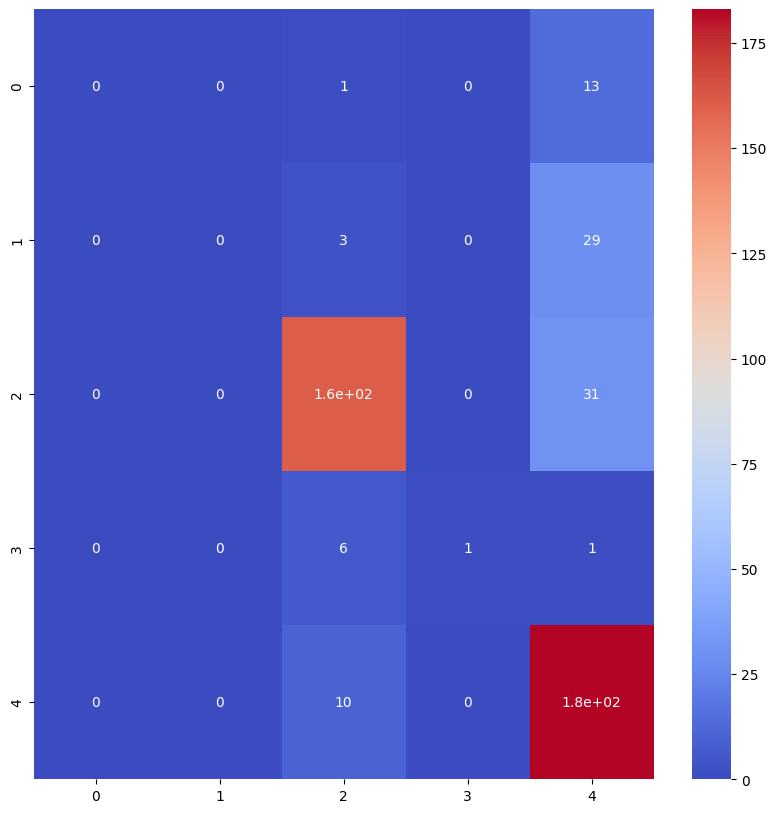

In [64]:
# calcoliamo la matrice di confusione
from sklearn.metrics import confusion_matrix

# calcoliamo la matrice di confusione
matrix = confusion_matrix(y_test, y_pred)

# stampiamo la matrice di confusione con una heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()


In [65]:
# valutiamo il modello con le metriche di valutazione
from sklearn.metrics import recall_score, precision_score, f1_score

# calcoliamo la recall
recall = recall_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo la precision
precision = precision_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo la f1
f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)

# stampiamo le metriche e l'accuratezza del modello
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")
print(f"Accuracy: {accuracy}")


Recall: 0.785876993166287
Precision: 0.785876993166287
F1: 0.785876993166287
Accuracy: 0.785876993166287


In [66]:
# calcoliamo il coefficiente di correlazione Kappa di Cohen
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)

def kappa_to_text(kappa):
    if kappa < 0:
        text =  "non c'è concordanza"
    elif kappa >= 0 and kappa < 0.4:
        text = "la concordanza è scarsa"
    elif kappa >= 0.4 and kappa < 0.6:
        text = "la concordanza è discreta"
    elif kappa >= 0.6 and kappa < 0.8:
        text = "la concordanza è buona"
    elif kappa >= 0.8 and kappa <= 1:
        text = "la concordanza è ottima"
    else:
        text = "errore"
    
    return kappa, text

print('Kappa di Cohen: ', kappa_to_text(kappa))

Kappa di Cohen:  (0.6191768180140274, 'la concordanza è buona')


PROVIAMO UN ALTRO TIPO DI MODELLO: RANDOM FOREST

In [67]:
# importiamo le librerie necessarie
import pandas as pd
import numpy as np

# Importiamo le librerie per la classificazione e la valutazione
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# importiamo le librerie per la visualizzazione degli alberi di decisione
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Recall: 0.8314350797266514
Precision: 0.8314350797266514
F1: 0.8314350797266514
Accuracy: 0.8314350797266514


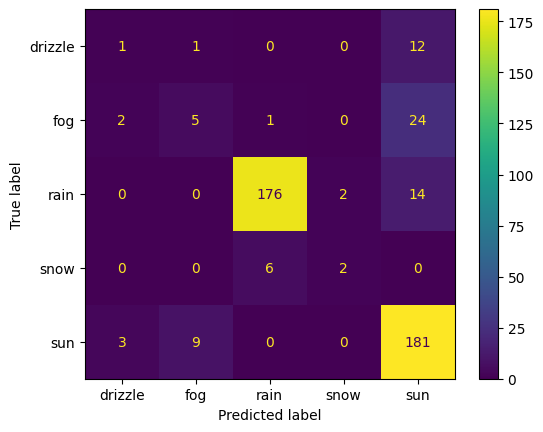

In [68]:
# creiamo il modello
rf = RandomForestClassifier(random_state=42)

# addestriamo il modello
rf.fit(X_train, y_train)

# effettuiamo le predizioni sul test set
y_pred = rf.predict(X_test)

# rappresentiamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

# calcoliamo la recall
recall = recall_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo la precision
precision = precision_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo la f1
f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)

# stampiamo le metriche e l'accuratezza del modello
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")
print(f"Accuracy: {accuracy}")


In [69]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Creiamo un oggetto random forest
rf = RandomForestClassifier()

# Usiamo RandomizedSearchCV per trovare i migliori parametri
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Addestriamo il modello con i migliori parametri
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd1d5bbe350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd1d5d05420>})

In [70]:
# Creiamo una variabile con il modello migliore
best_rf = rand_search.best_estimator_

# Printiamo i parametri migliori
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 341}


Recall: 0.8428246013667426
Precision: 0.8428246013667426
F1: 0.8428246013667428
Accuracy: 0.8428246013667426


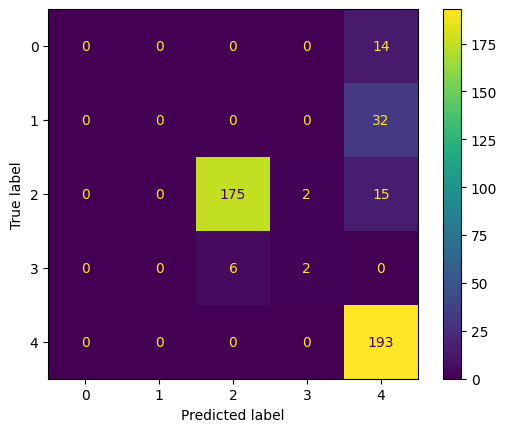

In [71]:
# generiamo le predizioni sul test set
y_pred = best_rf.predict(X_test)

# Creiamo una confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# calcoliamo la recall
recall = recall_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo la precision
precision = precision_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo la f1
f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)

# calcoliamo l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)

# stampiamo le metriche e l'accuratezza del modello
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")
print(f"Accuracy: {accuracy}")


<AxesSubplot:>

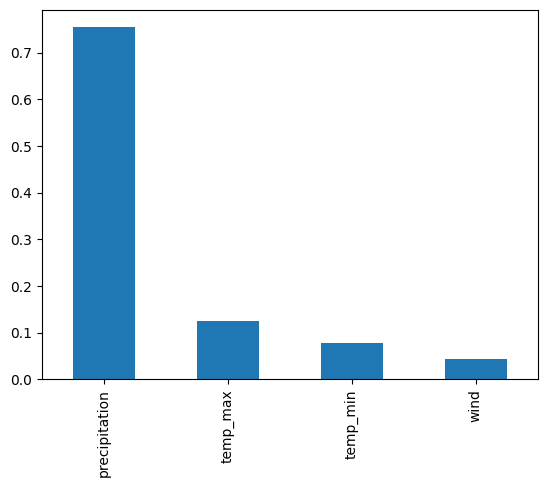

In [72]:
# Crea una serie contenente l'importanza delle funzionalità dal modello e i nomi delle funzionalità dai dati di addestramento
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotti un grafico a barre
feature_importances.plot.bar()

PROVIAMO ORA CON UNA KNN

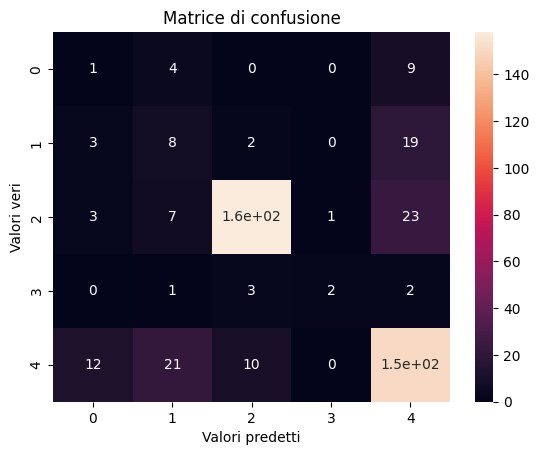

Accuracy:  0.7266514806378133
Precision:  0.7266514806378133
Recall:  0.7266514806378133
F1:  0.7266514806378133


In [73]:
# creiamo il modello
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

# prediciamo i valori
y_pred = classifier.predict(X_test)

# valutiamo il modello
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# creiamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title('Matrice di confusione')
plt.xlabel('Valori predetti')
plt.ylabel('Valori veri')
plt.show()


# valutiamo l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# valutiamo la precisione
precision = precision_score(y_test, y_pred, average='micro', zero_division=0)
print('Precision: ', precision)

# valutiamo il recall
recall = recall_score(y_test, y_pred, average='micro', zero_division=0)
print('Recall: ', recall)

# valutiamo la f1
f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)
print('F1: ', f1)

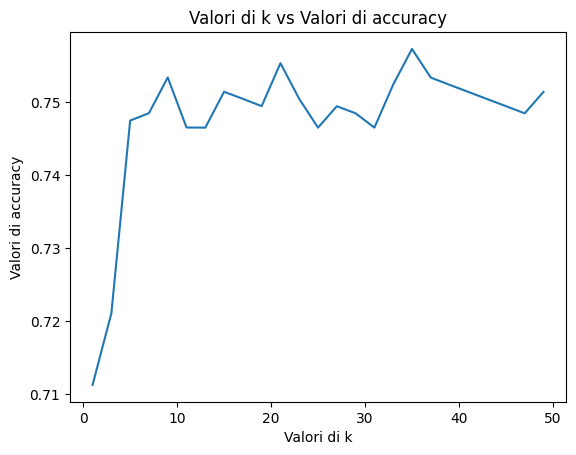

In [74]:
# ricerchiamo il migliore valore di k con la cross validation
from sklearn.model_selection import cross_val_score

# creiamo una lista di valori di k
k_list = list(range(1, 50, 2))

# creiamo una lista per i valori di accuracy
accuracy_list = []

# creiamo un ciclo per trovare il valore di k migliore
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'accuracy')
    accuracy_list.append(score.mean())

# grafichiamo i valori di accuracy con matplotlib
plt.plot(k_list, accuracy_list)
#sns.lineplot(x = k_list, y = accuracy_list)
plt.xlabel('Valori di k')
plt.ylabel('Valori di accuracy')
plt.title('Valori di k vs Valori di accuracy')
plt.show()

In [75]:
# cerchiamo il valore di k migliore
best_index = np.argmax(accuracy_list)
best_k = k_list[best_index]

print('Il valore di k migliore è: ', best_k)

Il valore di k migliore è:  35


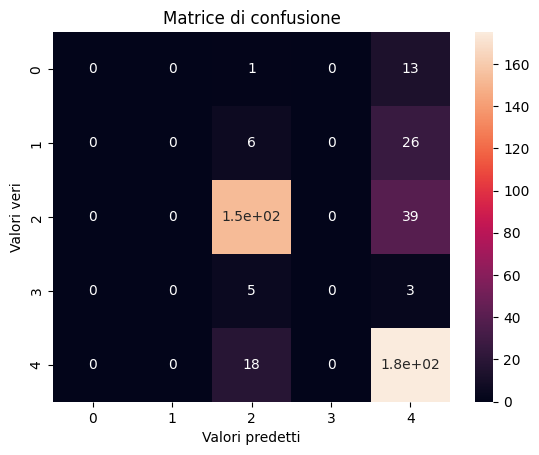

Accuracy:  0.7471526195899773
Precision:  0.7471526195899773
Recall:  0.7471526195899773
F1:  0.7471526195899773


In [76]:
classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier.fit(X_train, y_train)

# prediciamo i valori
y_pred = classifier.predict(X_test)

# creiamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title('Matrice di confusione')
plt.xlabel('Valori predetti')
plt.ylabel('Valori veri')
plt.show()


# valutiamo l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# valutiamo la precisione
precision = precision_score(y_test, y_pred, average='micro', zero_division=0)
print('Precision: ', precision)

# valutiamo il recall
recall = recall_score(y_test, y_pred, average='micro', zero_division=0)
print('Recall: ', recall)

# valutiamo la f1
f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)
print('F1: ', f1)